In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Notears

In [29]:
data = pd.read_csv("baseline-notears.csv", index_col=None)
data['shd'] = data['efals'] + data['espur'] + data['emiss']
data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals'])
data['time'] = data['time']/3600


count_df = data.groupby(by=['dataname', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].count().reset_index()
std_df = data.groupby(by=['dataname', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

data = data.groupby(by=['dataname', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    data[col + "_ci95"] = std_df[col]

data.fillna(0, inplace=True)

/tmp/ipykernel_1027335/3274388597.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_df = data.groupby(by=['dataname', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].count().reset_index()
/tmp/ipykernel_1027335/3274388597.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std_df = data.groupby(by=['dataname', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].std().reset_index()
/tmp/ipykernel_1027335/3274388597.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data.groupby(by=['dataname', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].mean().reset_index()


In [30]:
proposal = pd.read_csv("proposal-notears.csv", index_col=None)

proposal = proposal[proposal['b'] == 4]
proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['time'] = proposal['time']/3600

count_df = proposal.groupby(by=['dataname', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].count().reset_index()
std_df = proposal.groupby(by=['dataname', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

proposal = proposal.groupby(by=['dataname', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]

proposal.fillna(0, inplace=True)

/tmp/ipykernel_1027335/3475641849.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_df = proposal.groupby(by=['dataname', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].count().reset_index()
/tmp/ipykernel_1027335/3475641849.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std_df = proposal.groupby(by=['dataname', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].std().reset_index()
/tmp/ipykernel_1027335/3475641849.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  proposal = proposal.groupby(by=['dataname', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].mean().reset_index()


In [31]:
baselines = np.unique(data['baseline']).tolist()
baselines

['DAS', 'FCI', 'GIES', 'MLPNotears', 'Notears', 'SCORE']

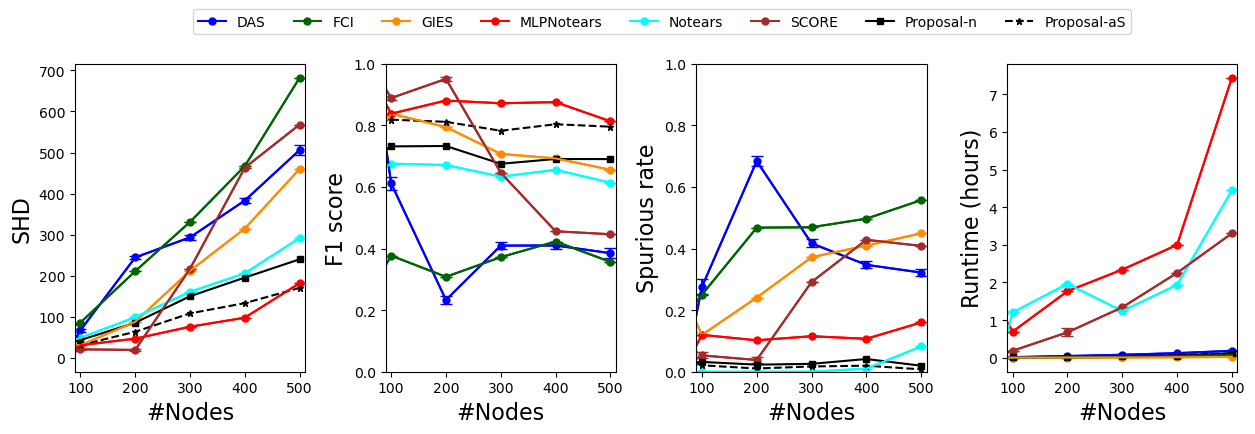

In [32]:
fig, axes = plt.subplot_mosaic("ABCD", figsize=(15, 4))
axes['A'].set_xlabel("#Nodes", fontsize=16)

metric = 'shd'
axes['A'].set_ylabel('SHD', fontsize=16)
axes['A'].set_xlim(90, 510)
xaxis = np.unique(data['d']).tolist()

baselines = ['DAS', 'FCI', 'GIES', 'MLPNotears', 'Notears', 'SCORE']
colors = ['blue', 'darkgreen', 'darkorange', 'red', 'cyan', 'brown']
for algo in baselines:
    axes['A'].plot(xaxis, data[data['baseline'] == algo][metric], 
            markersize=5, marker='o', linewidth=1.5, linestyle='-', label=algo, color=colors[baselines.index(algo)])
    axes['A'].errorbar(xaxis, data[data['baseline'] == algo][metric], 
                       yerr=data[data['baseline'] == algo][metric +"_ci95"], capsize=4, fmt="-", color=colors[baselines.index(algo)])
    
axes['A'].plot(xaxis, proposal[proposal['mode'] == 'n'][metric], 
               color='black', markersize=5, marker='s', linewidth=1.5, linestyle='-', label="Proposal-n")
axes['A'].plot(xaxis, proposal[proposal['mode'] == 'aS'][metric], 
               color='black', markersize=5, marker='*', linewidth=1.5, linestyle='--', label="Proposal-aS")


# ====================================================== #
metric = 'F1'
axes['B'].set_xlabel("#Nodes", fontsize=16)
axes['B'].set_ylabel('F1 score', fontsize=16)
axes['B'].set_xlim(90, 510)
axes['B'].set_ylim(0, 1)
xaxis = np.unique(data['d']).tolist()
for algo in baselines:
    axes['B'].plot(xaxis, data[data['baseline'] == algo][metric], 
            markersize=5, marker='o', linewidth=1.5, linestyle='-', label=algo, color=colors[baselines.index(algo)])
    axes['B'].errorbar(xaxis, data[data['baseline'] == algo][metric], 
                       yerr=data[data['baseline'] == algo][metric +"_ci95"], capsize=4, fmt="-", color=colors[baselines.index(algo)])
    
axes['B'].plot(xaxis, proposal[proposal['mode'] == 'n'][metric], 
               color='black', markersize=5, marker='s', linewidth=1.5, linestyle='-', label="Proposal-n")
axes['B'].plot(xaxis, proposal[proposal['mode'] == 'aS'][metric], 
               color='black', markersize=5, marker='*', linewidth=1.5, linestyle='--', label="Proposal-aS")
axes['B'].legend(loc='upper center', bbox_to_anchor=(1.2, 1.2), ncol=8)

# ====================================================== #
metric = 'spuriousness'
axes['C'].set_xlabel("#Nodes", fontsize=16)
axes['C'].set_ylabel("Spurious rate", fontsize=16)
axes['C'].set_xlim(90, 510)
axes['C'].set_ylim(0, 1)
xaxis = np.unique(data['d']).tolist()
for algo in baselines:
    axes['C'].plot(xaxis, data[data['baseline'] == algo][metric], 
            markersize=5, marker='o', linewidth=1.5, linestyle='-', label=algo, color=colors[baselines.index(algo)])
    axes['C'].errorbar(xaxis, data[data['baseline'] == algo][metric], 
                       yerr=data[data['baseline'] == algo][metric +"_ci95"], capsize=4, fmt="-", color=colors[baselines.index(algo)])
    
axes['C'].plot(xaxis, proposal[proposal['mode'] == 'n'][metric], 
               color='black', markersize=5, marker='s', linewidth=1.5, linestyle='-', label="Proposal-n")
axes['C'].plot(xaxis, proposal[proposal['mode'] == 'aS'][metric], 
               color='black', markersize=5, marker='*', linewidth=1.5, linestyle='--', label="Proposal-aS")

# ====================================================== #
metric = 'time'
axes['D'].set_xlabel("#Nodes", fontsize=16)
axes['D'].set_ylabel(rf"Runtime (hours)", fontsize=16)
axes['D'].set_xlim(90, 510)
# axes['D'].set_ylim(0, 5)
xaxis = np.unique(data['d']).tolist()
for algo in baselines:
    axes['D'].plot(xaxis, data[data['baseline'] == algo][metric], 
            markersize=5, marker='o', linewidth=1.5, linestyle='-', label=algo, color=colors[baselines.index(algo)])
    axes['D'].errorbar(xaxis, data[data['baseline'] == algo][metric], 
                       yerr=data[data['baseline'] == algo][metric +"_ci95"], capsize=4, fmt="-", color=colors[baselines.index(algo)])
    
axes['D'].plot(xaxis, proposal[proposal['mode'] == 'n'][metric], 
               color='black', markersize=5, marker='s', linewidth=1.5, linestyle='-', label="Proposal-n")
axes['D'].plot(xaxis, proposal[proposal['mode'] == 'aS'][metric], 
               color='black', markersize=5, marker='*', linewidth=1.5, linestyle='--', label="Proposal-aS")

plt.subplots_adjust(wspace=0.35)

### Synthesize discrete

In [33]:
data = pd.read_csv("baseline_synthesize.csv", index_col=None)
# data['shd'] = data['efals'] + data['espur'] + data['emiss']
data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals'])

data['time'] = data['time']/3600
data['d'] = [data['dataname'].iloc[i].split('/')[1].split('_')[0][1:] for i in range(len(data))]
data['p'] = [data['dataname'].iloc[i].split('/')[1].split('_')[1] for i in range(len(data))]

count_df = data.groupby(by=['p', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].count().reset_index()
std_df = data.groupby(by=['p', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

data = data.groupby(by=['p', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    data[col + "_ci95"] = std_df[col]

data.fillna(0, inplace=True)
# data

/tmp/ipykernel_1027335/2210404886.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_df = data.groupby(by=['p', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].count().reset_index()
/tmp/ipykernel_1027335/2210404886.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std_df = data.groupby(by=['p', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].std().reset_index()
/tmp/ipykernel_1027335/2210404886.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data.groupby(by=['p', 'd', 'baseline'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].mean().reset_index()


In [34]:
proposal = pd.read_csv("proposal-synthesize-rerun.csv", index_col=None)

proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])

proposal['time'] = proposal['time']/3600
proposal['d'] = [proposal['dataname'].iloc[i].split('/')[1].split('_')[0][1:] for i in range(len(proposal))]
proposal['p'] = [proposal['dataname'].iloc[i].split('/')[1].split('_')[1] for i in range(len(proposal))]

count_df = proposal.groupby(by=['p', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].count().reset_index()
std_df = proposal.groupby(by=['p', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].std().reset_index()
std_df.iloc[:, 3:] *= 1.96/np.sqrt(count_df.iloc[:, 3:])

proposal = proposal.groupby(by=['p', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].mean().reset_index()
all_cols = ['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time']
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]
proposal.fillna(0, inplace=True)

/tmp/ipykernel_1027335/2731169848.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_df = proposal.groupby(by=['p', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].count().reset_index()
/tmp/ipykernel_1027335/2731169848.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std_df = proposal.groupby(by=['p', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].std().reset_index()
/tmp/ipykernel_1027335/2731169848.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  proposal = proposal.groupby(by=['p', 'd', 'mode'])['shd', 'precision', 'recall', 'F1', 'spuriousness', 'time'].mean().reset_index()


In [35]:
ps = np.unique(data['p']).tolist()
ds = sorted(np.unique(data['d']).tolist(), key=lambda item: int(item))

print(ps)
print(ds)

['easy', 'hard', 'intermediate']
['20', '40', '60', '80', '100', '200', '300', '400', '500']


In [49]:
subdata = data[data['p'] == 'hard']
subdata.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)

subproposal = proposal[proposal['p'] == 'hard']
subproposal.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)

/tmp/ipykernel_1027335/4027929276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)
/tmp/ipykernel_1027335/4027929276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subproposal.sort_values(by=['d'], key=lambda item: item.astype(int), inplace=True)


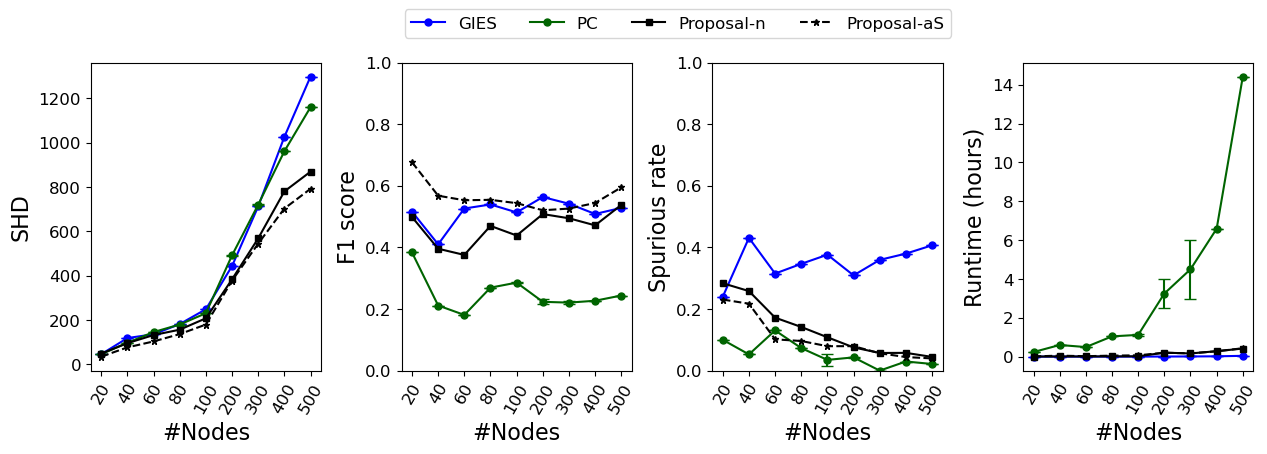

In [50]:
plt.rcParams.update({"font.size": 12})

fig, axes = plt.subplot_mosaic("ABCD", figsize=(15, 4))
axes['A'].set_xlabel("#Nodes", fontsize=16)

metric = 'shd'
axes['A'].set_ylabel('SHD', fontsize=16)
# axes['A'].set_xlim(90, 510)
xaxis = ds

baselines = ["GIES", "PC"]
colors = ['blue', 'darkgreen', 'darkorange', 'red', 'cyan', 'brown']
for algo in baselines:
    axes['A'].plot(xaxis, subdata[subdata['baseline'] == algo][metric], 
            markersize=5, marker='o', linewidth=1.5, linestyle='-', label=algo, color=colors[baselines.index(algo)])
    axes['A'].errorbar(xaxis, subdata[subdata['baseline'] == algo][metric], 
                       yerr=subdata[subdata['baseline'] == algo][metric +"_ci95"], capsize=4, fmt=".", markersize=0, color=colors[baselines.index(algo)])
    
axes['A'].plot(xaxis, subproposal[subproposal['mode'] == 'n'][metric], color='black', markersize=5, marker='s', linewidth=1.5, linestyle='-', label="Proposal-n")
axes['A'].plot(xaxis, subproposal[subproposal['mode'] == 'aS'][metric], color='black', markersize=5, marker='*', linewidth=1.5, linestyle='--', label="Proposal-aS")
axes['A'].set_xticks(xaxis, xaxis, rotation=60)

# ====================================================== #
metric = 'F1'
axes['B'].set_xlabel("#Nodes", fontsize=16)
axes['B'].set_ylabel('F1 score', fontsize=16)
# axes['B'].set_xlim(90, 510)
axes['B'].set_ylim(0, 1)
# xaxis = np.unique(subdata['d']).tolist()
for algo in baselines:
    axes['B'].plot(xaxis, subdata[subdata['baseline'] == algo][metric], 
            markersize=5, marker='o', linewidth=1.5, linestyle='-', label=algo, color=colors[baselines.index(algo)])
    axes['B'].errorbar(xaxis, subdata[subdata['baseline'] == algo][metric], 
                       yerr=subdata[subdata['baseline'] == algo][metric +"_ci95"], capsize=4, fmt=".", markersize=0, ecolor=colors[baselines.index(algo)])
    
axes['B'].plot(xaxis, subproposal[subproposal['mode'] == 'n'][metric], color='black', markersize=5, marker='s', linewidth=1.5, linestyle='-', label="Proposal-n")
axes['B'].plot(xaxis, subproposal[subproposal['mode'] == 'aS'][metric], color='black', markersize=5, marker='*', linewidth=1.5, linestyle='--', label="Proposal-aS")
axes['B'].legend(loc='upper center', bbox_to_anchor=(1.2, 1.2), ncol=8)
axes['B'].set_xticks(xaxis, xaxis, rotation=60)

# ====================================================== #
metric = 'spuriousness'
axes['C'].set_xlabel("#Nodes", fontsize=16)
axes['C'].set_ylabel(rf"Spurious rate", fontsize=16)
# axes['C'].set_xlim(90, 510)
axes['C'].set_ylim(0, 1)
# xaxis = np.unique(subdata['d']).tolist()
for algo in baselines:
    axes['C'].plot(xaxis, subdata[subdata['baseline'] == algo][metric], 
            markersize=5, marker='o', linewidth=1.5, linestyle='-', label=algo, color=colors[baselines.index(algo)])
    axes['C'].errorbar(xaxis, subdata[subdata['baseline'] == algo][metric], 
                       yerr=subdata[subdata['baseline'] == algo][metric +"_ci95"], capsize=4, fmt=".", markersize=0, ecolor=colors[baselines.index(algo)])
    
axes['C'].plot(xaxis, subproposal[subproposal['mode'] == 'n'][metric], color='black', markersize=5, marker='s', linewidth=1.5, linestyle='-', label="Proposal-n")
axes['C'].plot(xaxis, subproposal[subproposal['mode'] == 'aS'][metric], color='black', markersize=5, marker='*', linewidth=1.5, linestyle='--', label="Proposal-aS")
axes['C'].set_xticks(xaxis, xaxis, rotation=60)

# ====================================================== #
metric = 'time'
axes['D'].set_xlabel("#Nodes", fontsize=16)
axes['D'].set_ylabel(rf"Runtime (hours)", fontsize=16)
# axes['D'].set_xlim(90, 510)
# axes['D'].set_ylim(0, 5)
# xaxis = np.unique(subdata['d']).tolist()
for algo in baselines:
    axes['D'].plot(xaxis, subdata[subdata['baseline'] == algo][metric], 
            markersize=5, marker='o', linewidth=1.5, linestyle='-', label=algo, color=colors[baselines.index(algo)])
    axes['D'].errorbar(xaxis, subdata[subdata['baseline'] == algo][metric], 
                       yerr=subdata[subdata['baseline'] == algo][metric +"_ci95"], capsize=4, fmt=".", markersize=0, ecolor=colors[baselines.index(algo)])
    
axes['D'].plot(xaxis, subproposal[subproposal['mode'] == 'n'][metric], color='black', markersize=5, marker='s', linewidth=1.5, linestyle='-', label="Proposal-n")
axes['D'].plot(xaxis, subproposal[subproposal['mode'] == 'aS'][metric], color='black', markersize=5, marker='*', linewidth=1.5, linestyle='--', label="Proposal-aS")
axes['D'].set_xticks(xaxis, xaxis, rotation=60)

plt.subplots_adjust(wspace=0.35)

### Real-data

In [2]:
data = pd.read_csv("baseline_generic.csv", index_col=None)

data['precision'] = data['etrue']/(data['etrue'] + data['espur'] + data['efals'])
data['spuriousness'] = data['espur']/(data['etrue'] + data['espur'] + data['efals'])
data['recall'] = data['etrue']/(data['etrue'] + data['emiss'])
data['F1'] = 2 * data['precision'] * data['recall']/(data['precision'] + data['recall'])
data['time'] = data['time']/3600
data['espur'] = np.log10(data['espur'] + 1)
data['shd'] = np.log10(data['efals'] + data['espur'] + data['emiss'])

count_df = data.groupby(by=['dataname', 'baseline'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].count().reset_index()
std_df = data.groupby(by=['dataname', 'baseline'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].std().reset_index()
std_df.iloc[:, 2:] *= 1.96/np.sqrt(count_df.iloc[:, 2:])

data = data.groupby(by=['dataname', 'baseline'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].mean().reset_index()
all_cols = ['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]
for col in all_cols:
    data[col + "_ci95"] = std_df[col]

data.fillna(0, inplace=True)
# data

/tmp/ipykernel_3170789/1580607428.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_df = data.groupby(by=['dataname', 'baseline'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].count().reset_index()
/tmp/ipykernel_3170789/1580607428.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std_df = data.groupby(by=['dataname', 'baseline'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].std().reset_index()
/tmp/ipykernel_3170789/1580607428.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = data.groupby(by=['dataname', 'baseline'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].mean().reset_index()


In [3]:
proposal = pd.read_csv("proposal-generic-fin.csv", index_col=None)
proposal['precision'] = proposal['etrue']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['spuriousness'] = proposal['espur']/(proposal['etrue'] + proposal['espur'] + proposal['efals'])
proposal['recall'] = proposal['etrue']/(proposal['etrue'] + proposal['emiss'])
proposal['F1'] = 2 * proposal['precision'] * proposal['recall']/(proposal['precision'] + proposal['recall'])
proposal['time'] = proposal['time']/3600
proposal['shd'] = np.log10(proposal['efals'] + proposal['espur'] + proposal['emiss'])
proposal['espur'] = np.log10(proposal['espur'] + 1)

count_df = proposal.groupby(by=['dataname', 'mode'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].count().reset_index()
std_df = proposal.groupby(by=['dataname', 'mode'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].std().reset_index()
std_df.iloc[:, 2:] *= 1.96/np.sqrt(count_df.iloc[:, 2:])

proposal = proposal.groupby(by=['dataname', 'mode'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].mean().reset_index()
all_cols = ['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"]
for col in all_cols:
    proposal[col + "_ci95"] = std_df[col]
proposal.fillna(0, inplace=True)

/home/admin/miniconda3/envs/easyFL/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3170789/353211895.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_df = proposal.groupby(by=['dataname', 'mode'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].count().reset_index()
/tmp/ipykernel_3170789/353211895.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  std_df = proposal.groupby(by=['dataname', 'mode'])['shd', 'espur', 'precision', 'recall', 'F1', 'time', "spuriousness"].std().reset_index()
/tmp/ipykernel_3170789/353211895.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  proposal = propos

In [4]:
baselines = ['PC', 'GIES']
names = ["sachs", "insurance", "water", "alarm", "barley", "pathfinder"]#, "munin"]

In [5]:
F1_data = {}
for algo in baselines:
    vals, yerrs = [], []
    for name in names:
        try:
            new_val = data[data['dataname'] == name][data['baseline'] == algo]['F1'].item()
            new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['F1_ci95'].item()
        except:
            new_val = 0
            new_yerrs = 0
        vals.append(new_val)
        yerrs.append(new_yerrs)
    F1_data[algo] = (vals, yerrs)

for mode in ['n', 'aS']:
    vals, yerrs = [], []
    for name in names:
        try:
            vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['F1'].item())
            yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['F1_ci95'].item())
        except:
            vals.append(0)
            yerrs.append(0)
    F1_data['Proposal-' + mode] = (vals, yerrs)

/tmp/ipykernel_3170789/4062021083.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_val = data[data['dataname'] == name][data['baseline'] == algo]['F1'].item()
/tmp/ipykernel_3170789/4062021083.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['F1_ci95'].item()
/tmp/ipykernel_3170789/4062021083.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['F1'].item())
/tmp/ipykernel_3170789/4062021083.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['F1_ci95'].item())


In [6]:
plot_data2 = {}
for algo in baselines:
    vals, yerrs = [], []
    for name in names:
        try:
            new_val = data[data['dataname'] == name][data['baseline'] == algo]['spuriousness'].item()
            new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['spuriousness_ci95'].item()
        except:
            new_val = 0
            new_yerrs = 0
        vals.append(new_val)
        yerrs.append(new_yerrs)
    plot_data2[algo] = (vals, yerrs)

for mode in ['n', 'aS']:
    vals, yerrs = [], []
    for name in names:
        try:
            vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['spuriousness'].item())
            yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['spuriousness_ci95'].item())
        except:
            vals.append(0)
            yerrs.append(0)
    plot_data2['Proposal-' + mode] = (vals, yerrs)

/tmp/ipykernel_3170789/401204701.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_val = data[data['dataname'] == name][data['baseline'] == algo]['spuriousness'].item()
/tmp/ipykernel_3170789/401204701.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['spuriousness_ci95'].item()
/tmp/ipykernel_3170789/401204701.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['spuriousness'].item())
/tmp/ipykernel_3170789/401204701.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['spuriousness_ci95'].item())


In [7]:
plot_data3 = {}
for algo in baselines:
    vals, yerrs = [], []
    for name in names:
        try:
            new_val = data[data['dataname'] == name][data['baseline'] == algo]['time'].item()
            new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['time_ci95'].item()
        except:
            new_val = 0
            new_yerrs = 0
        vals.append(new_val)
        yerrs.append(new_yerrs)
    plot_data3[algo] = (vals, yerrs)

for mode in ['n', 'aS']:
    vals, yerrs = [], []
    for name in names:
        try:
            vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['time'].item())
            yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['time_ci95'].item())
        except:
            vals.append(0)
            yerrs.append(0)
    plot_data3['Proposal-' + mode] = (vals, yerrs)

/tmp/ipykernel_3170789/2593407085.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_val = data[data['dataname'] == name][data['baseline'] == algo]['time'].item()
/tmp/ipykernel_3170789/2593407085.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_yerrs = data[data['dataname'] == name][data['baseline'] == algo]['time_ci95'].item()
/tmp/ipykernel_3170789/2593407085.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vals.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['time'].item())
/tmp/ipykernel_3170789/2593407085.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yerrs.append(proposal[proposal['dataname'] == name][proposal['mode'] == mode]['time_ci95'].item())


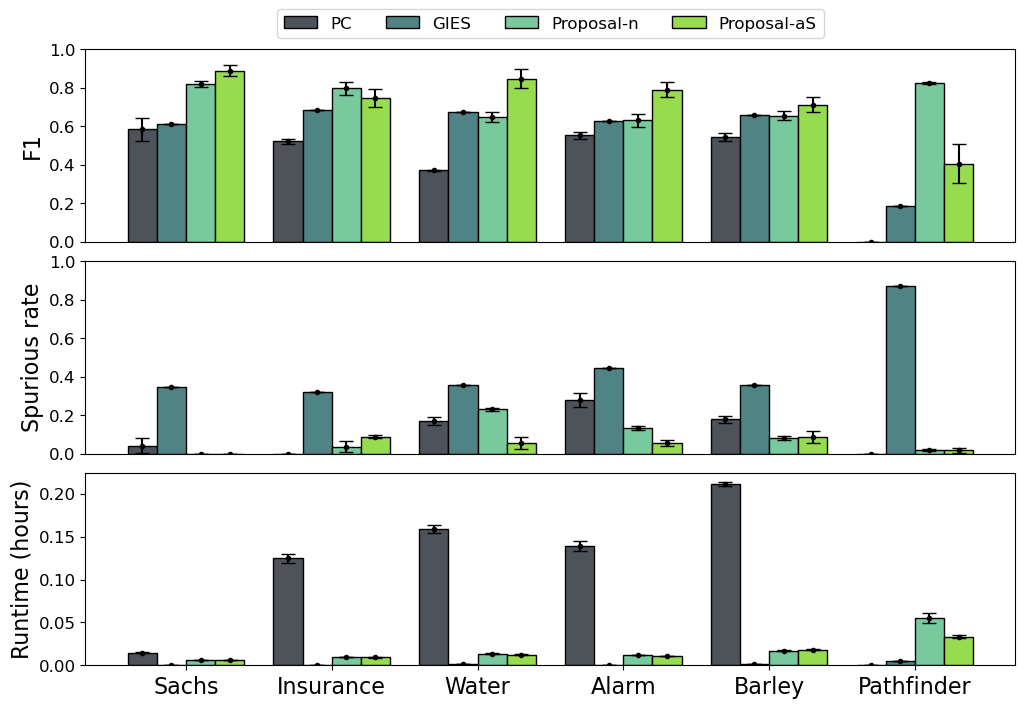

In [8]:
plt.rcParams.update({"font.size": 12})

fig, axes = plt.subplot_mosaic("A;B;C", figsize=(12, 8))
# fig, ax = plt.subplots(figsize=(8, 3))

N = len(names)
ind = np.arange(N)
width = 0.2

colors = ['#4D5359', '#508484', '#79C99E', '#97DB4F']

# ===============================================================================
i = 0
charts = []
for algo in F1_data.keys():
    vals = F1_data[algo]
    bar = axes['A'].bar(ind + i*width, vals[0], width, color = colors[i], edgecolor="black") 
    axes['A'].errorbar(ind + i*width, vals[0], vals[1], color="#000000", capsize=5, fmt=".")
    charts.append(bar)
    i += 1
  
axes['A'].set_xlabel("") 
axes['A'].set_ylabel('F1', fontsize=16) 
axes['A'].set_ylim(0,1)

axes['A'].set_xticks([]) 
axes['A'].legend(charts, ('PC', 'GIES', 'Proposal-n', 'Proposal-aS'), 
          ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.25)) 

# ===============================================================================
i = 0
for algo in plot_data2.keys():
    vals = plot_data2[algo]
    bar = axes['B'].bar(ind + i*width, vals[0], width, color = colors[i], edgecolor="black") 
    axes['B'].errorbar(ind + i*width, vals[0], vals[1], color="#000000", capsize=5, fmt=".")
    i += 1
  
axes['B'].set_xlabel("") 
axes['B'].set_ylabel(rf'Spurious rate', fontsize=16) 
axes['B'].set_xticks([])
axes['B'].set_ylim(0,1)
# axes['B'].set_yticks([0, 1, 2, 3], ["0"] + [rf"$10^{i}$" for i in [1,2,3]])
# axes['B'].legend(charts, ('PC', 'GIES', 'Proposal-n', 'Proposal-aS'), 
#           ncol=4, loc='upper left')

# ===============================================================================
i = 0
for algo in plot_data3.keys():
    vals = plot_data3[algo]
    bar = axes['C'].bar(ind + i*width, vals[0], width, color = colors[i], edgecolor="black") 
    axes['C'].errorbar(ind + i*width, vals[0], vals[1], color="#000000", capsize=5, fmt=".")
    i += 1
  
axes['C'].set_xlabel("") 
axes['C'].set_ylabel(rf'Runtime (hours)', fontsize=16) 
axes['C'].set_xticks(ind + width * (i-1)/2, [f"{i[0].upper()}{i[1:]}" for i in names], fontsize=16) 
# axes['C'].set_ylim(0,1)
# axes['C'].set_yticks([0, 1, 2, 3], ["0"] + [rf"$10^{i}$" for i in [1,2,3]])

plt.subplots_adjust(hspace=0.1)